# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [66]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,131,86,36,77,165,60,7,150,45,19,128,174,331,131,66,0,32,196,203
1,637,86,44,65,129,56,6,152,45,19,150,168,331,177,83,4,13,178,183
2,392,93,44,90,166,65,10,153,44,19,156,170,348,143,66,9,17,194,203
3,699,93,47,83,165,60,7,167,40,20,147,197,417,201,73,12,4,187,192
4,219,85,39,57,126,56,6,114,58,17,135,134,195,145,64,17,7,197,202
5,36,82,44,72,118,52,7,152,44,19,147,174,340,177,82,2,2,180,185
6,326,106,49,96,201,61,10,181,36,21,158,197,494,180,62,19,15,202,209
7,651,85,40,66,136,58,6,142,48,19,137,164,295,164,77,2,22,182,186
8,594,83,40,59,116,53,7,132,52,18,137,145,250,157,84,12,6,177,183
9,736,102,51,104,217,67,10,204,32,23,162,220,621,195,68,3,19,188,197


Methods `describe` and `info` deliver some useful information.

In [67]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,420.635701,93.500911,44.673953,81.735883,168.315118,61.759563,8.673953,167.879781,41.140255,20.497268,147.613843,188.023679,434.539162,173.732240,72.542805,6.360656,12.606557,188.892532,195.622951
std,245.717366,8.191732,6.158881,15.700011,33.627372,8.261495,4.947653,32.677479,7.738920,2.539917,14.421708,30.934198,173.062151,32.117077,7.757530,5.030308,8.933556,6.145537,7.410162
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,204.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,34.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,418.000000,93.000000,44.000000,79.000000,167.000000,61.000000,8.000000,156.000000,43.000000,19.000000,145.000000,177.000000,361.000000,173.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,641.000000,100.000000,49.000000,98.000000,193.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,578.000000,196.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,115.000000,58.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [68]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


Let's consider y_train:

In [69]:
y_train_pd = pd.DataFrame(y_train)
y_train_pd.head()

,0
0,saab
1,bus
2,van
3,opel
4,van


In [70]:
y_train_pd.describe()

,0
count,549
unique,4
top,saab
freq,140


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Okey, let's see has in our training section NaN or null values:

In [72]:
check_train_nan = [X_train_pd.isna().values.any(), y_train_pd.isna().values.any()]
check_train_null = [X_train_pd.isnull().values.any(), y_train_pd.isnull().values.any()]
train = ['X_train', 'y_train']
for nan, null, check in zip(check_train_nan, check_train_null, train):
    print(f"Has NaN values in {check}: {nan}")
    print(f"Has null values in {check}: {null}")

Has NaN values in X_train: False
Has null values in X_train: False
Has NaN values in y_train: False
Has null values in y_train: False


Let's visualize distribution of the features to see if there any obvious dependencies between them:

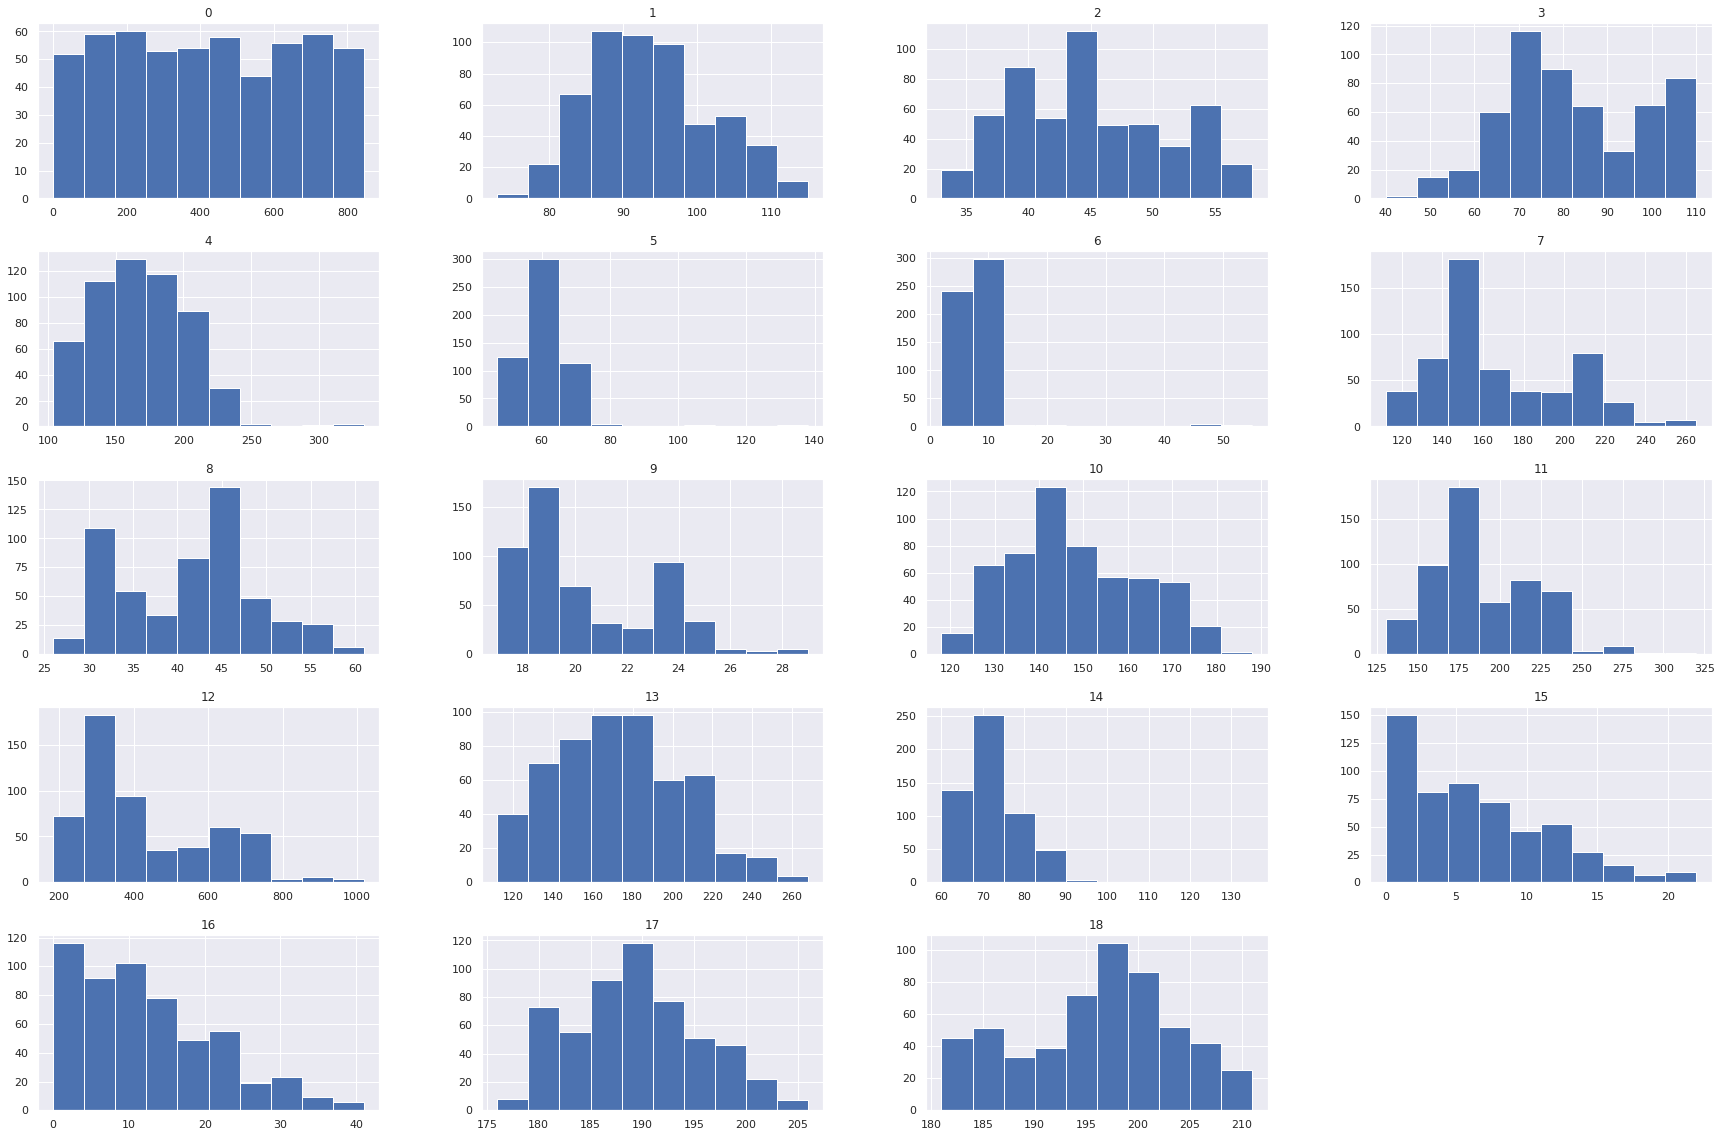

In [73]:
columns = X_train_pd.columns
X_train_pd[columns].hist(figsize=(30, 20))
plt.show()

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [18]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

#! pip install scikit-plot

Let's combine the normalization and the model itself in a pipeline to avoid data leak during cross-validation

In [75]:
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
pipeline = make_pipeline(StandardScaler(), model)

To simplify our life, let's define some function:

In [76]:
def print_best_results(clf):
  print(f"Best CV_accuracy is : {clf.best_score_}")
  for key, value in clf.best_params_.items():
    print(f"Best {key} is: {value}")

In [77]:
parameters = {'logisticregression__C': [10, 100, 1000]}
clf = GridSearchCV(pipeline, parameters, cv=5, error_score=0)
clf.fit(X_train, y_train)
print_best_results(clf)

Best CV_accuracy is : 0.7941951626355296
Best logisticregression__C is: 1000


Let's find f1 and accuracy scores of our model

In [78]:
from sklearn.metrics import f1_score, accuracy_score
def print_acc_f1_scores(clf, X_data, y_data, info):
  predict = clf.predict(X_data)
  print(f"Accuracy in {info} is: {accuracy_score(y_data, predict)}")
  print(f"F1_score in {info} is: {f1_score(y_data, predict, average='macro')}")

In [23]:
print_acc_f1_scores(clf, X_train, y_train, 'Train')

Accuracy in Train is: 0.8469945355191257
F1_score in Train is: 0.8468927179374209


In [79]:
print_acc_f1_scores(clf, X_test, y_test, 'Test')

Accuracy in Test is: 0.8114478114478114
F1_score in Test is: 0.8098875574205382


Let's draw our ROC Curves:
<br>
First of all, ROC-Curves for the training set

In [28]:
# ! pip install scikit-plot

In [80]:
import scikitplot as skplt
def plot_roc_curves(clf, X_data, y_data):
  predict_proba = clf.predict_proba(X_data)
  skplt.metrics.plot_roc(y_data, predict_proba)
  plt.show()

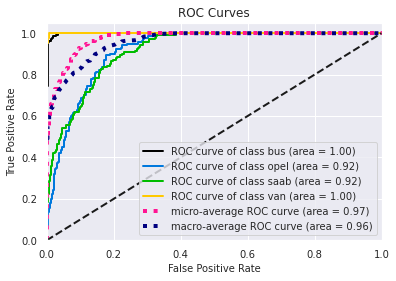

In [81]:
plot_roc_curves(clf, X_train, y_train)

Secondly, ROC-Curves for testing set

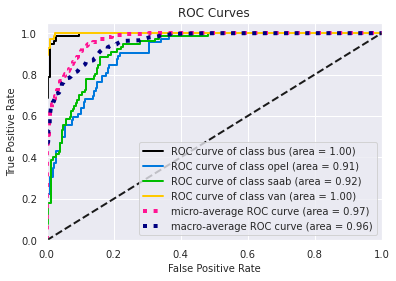

In [82]:
plot_roc_curves(clf, X_test, y_test)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [84]:
from sklearn.decomposition import PCA
pca = PCA()
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.fit_transform(X_test)
pca.fit(X_train_scaled)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eignvalues = np.cumsum(exp_var_pca)

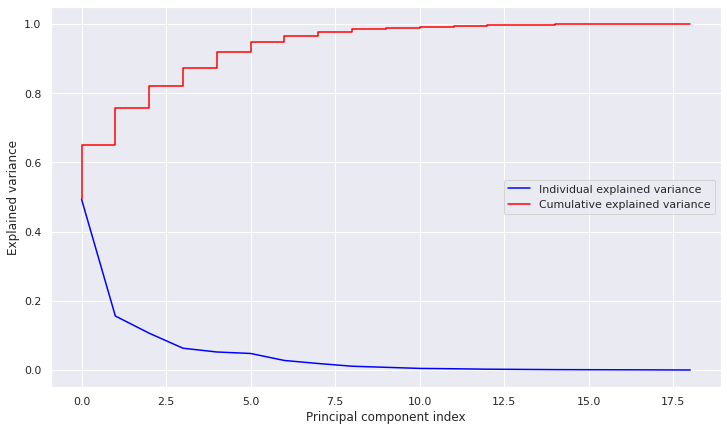

In [85]:
plt.figure(figsize=(12, 7))
plt.plot(np.arange(len(exp_var_pca)), exp_var_pca, color='blue', label='Individual explained variance')
plt.step(np.arange(len(cum_sum_eignvalues)), cum_sum_eignvalues, color='red', label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In general, it is necessary to normalize the data before applying PCA, as this method reflects our original data to those directions where the greatest variance is achieved. If we don't nomalize the data, the PCA will take into account features with a large scatter more than other features, and their contribution will be stronger. The graph shows that it is possible to project the data onto $n = 12$ principal components, since the remaining components make almost zero contribution, those the loss of information is minimal. When the number of components is 12, the proportion of explained variance is larger than 0.99, which for us is sufficient. We combine normalization and PCA in a pipeline to avoid data leak during cross-validation.

In [86]:
pca = PCA(n_components=12)
pipeline = make_pipeline(std, pca, model)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

I have trained two models. The first one uses pipeline from normalization, principal component selection and logisitic regression and the second one uses logistic regression on a fully preprocessed dataset. Despite the fact that the second model leaked data during cross-validation, while the first did not, the second model learned better.

In [87]:
parameters = {'logisticregression__C': [0.01, 0.1, 1, 10, 50, 100, 500, 1e3, 1e6]}
clf = GridSearchCV(pipeline, parameters, cv=5)
clf.fit(X_train, y_train)

print_best_results(clf)

Best CV_accuracy is : 0.7339949958298583
Best logisticregression__C is: 50


Let's consider accuracy and F1 score in testing section:

In [88]:
print_acc_f1_scores(clf, X_test, y_test, 'Test')

Accuracy in Test is: 0.7609427609427609
F1_score in Test is: 0.7594286382154545


Let's draw ROC-Curves for testing set

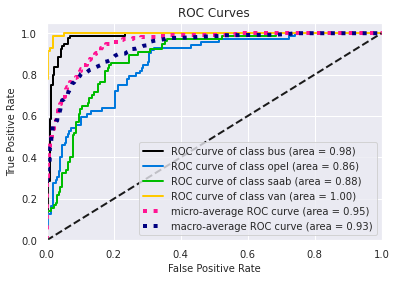

In [89]:
plot_roc_curves(clf, X_test, y_test)

In [90]:
parameters = {'C': [0.01, 0.1, 1, 10, 50, 100, 500, 1000, 1e6]}
clf = GridSearchCV(model, parameters, cv=5)
pca.fit(X_train_scaled)
clf.fit(pca.transform(X_train_scaled), y_train)

print_best_results(clf)

Best CV_accuracy is : 0.7394829024186823
Best C is: 100


Let's consider accuracy and F1 score for training scaled section:

In [91]:
print_acc_f1_scores(clf, pca.transform(X_train_scaled), y_train, 'Train')

Accuracy in Train is: 0.7577413479052824
F1_score in Train is: 0.7601454741927138


ROC-Curves for training scaled set:

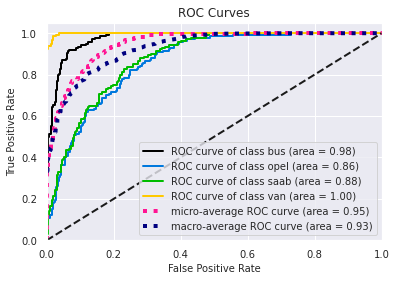

In [92]:
plot_roc_curves(clf, pca.transform(X_train_scaled), y_train)

Let's consider accuracy and F1 score for testing scaled section:

In [93]:
print_acc_f1_scores(clf, pca.transform(X_test_scaled), y_test, 'Test')

Accuracy in Test is: 0.7777777777777778
F1_score in Test is: 0.7743317717815248


ROC-Curves for testing scaled set:

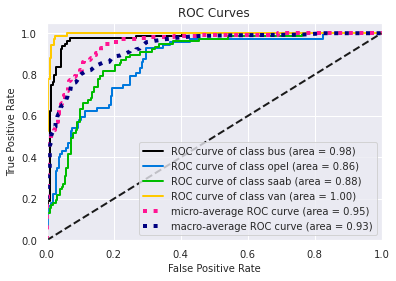

In [94]:
plot_roc_curves(clf, pca.transform(X_test_scaled), y_test)

The classification quality of the model has changed slightly compared to the logistic regression using all components

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dtc = DecisionTreeClassifier(random_state=42)
pipeline = make_pipeline(std, pca, dtc)
parameters = {
    "decisiontreeclassifier__max_depth": [1, 3, 5, 10, 12, 15],
    "decisiontreeclassifier__criterion": ["gini", "entropy"],
    "decisiontreeclassifier__min_samples_leaf": [1, 3, 5, 10],
    "decisiontreeclassifier__min_samples_split": [2, 3, 4, 5, 10],
    "decisiontreeclassifier__min_weight_fraction_leaf": [0.0, 0.1, 0.2]
}
clf = GridSearchCV(pipeline, parameters, cv=5)
clf.fit(X_train, y_train)

print_best_results(clf)

Best CV_accuracy is : 0.6247372810675563
Best decisiontreeclassifier__criterion is: entropy
Best decisiontreeclassifier__max_depth is: 15
Best decisiontreeclassifier__min_samples_leaf is: 5
Best decisiontreeclassifier__min_samples_split is: 2
Best decisiontreeclassifier__min_weight_fraction_leaf is: 0.0


Let's consider accuracy and F1 score for training section:

In [97]:
print_acc_f1_scores(clf, X_train, y_train, 'Train')

Accuracy in Train is: 0.8706739526411658
F1_score in Train is: 0.8711903945138404


Let's consider ROC-Curves for trainning set:

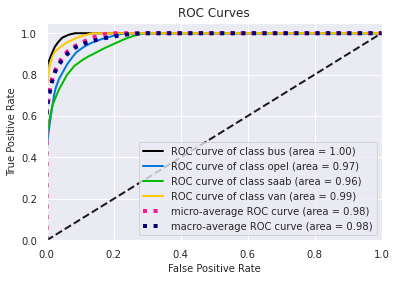

In [98]:
plot_roc_curves(clf, X_train, y_train)

Let's consider accuracy and F1 score for testing section:

In [99]:
print_acc_f1_scores(clf, X_test, y_test, 'Test')

Accuracy in Test is: 0.6397306397306397
F1_score in Test is: 0.6445382070910535


Let's consider ROC-Curves for trainning set:

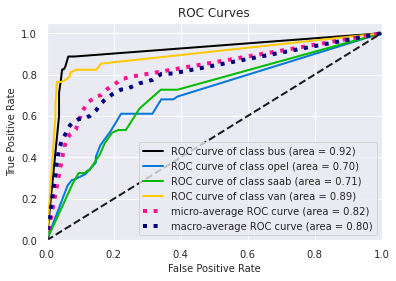

In [100]:
plot_roc_curves(clf, X_test, y_test)

The optimal tree depth is 15, the classification quality is lower than that of linear regression, there is overfitting, but it is not too large.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [101]:
from sklearn.ensemble import BaggingClassifier

Let's define some functions:

In [102]:
n_models = np.arange(2, 100, 5)
def bagging(model, scaler, pca, X_train, y_train, X_test, y_test, size):
  f1_scores = []
  accuracy_scores = []
  bagging_pipeline = make_pipeline(scaler, pca, model)
  for k in size:
    clf = BaggingClassifier(bagging_pipeline, n_estimators=k)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_predict))
    f1_scores.append(f1_score(y_test, y_predict, average='macro'))
  return accuracy_scores, f1_scores

In [103]:
def draw_plot(accuracy_scores, f1_scores, size, title, xlabel):
  plt.figure(figsize=(12, 7))
  plt.plot(size, accuracy_scores)
  plt.plot(size, f1_scores)
  plt.xlabel(xlabel)
  plt.ylabel("metric")
  plt.legend(["accuracy_score", "f1_score"], loc="best")
  plt.title(title)
  plt.show()

Let's consider first ensemble of logistic regressions:

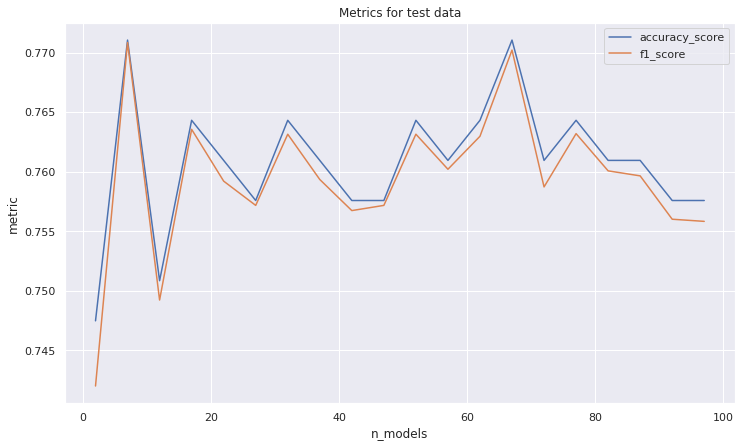

In [104]:
linear_regression_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=50)
linear_accuracy_scores, linear_f1_scores = bagging(linear_regression_model, std, pca, X_train, y_train, X_test, y_test, n_models)
draw_plot(linear_accuracy_scores, linear_f1_scores, n_models, 'Metrics for test data', 'n_models')

An ensemble of linear models does not give a profit (the difference in the metric is 0.025, and this does not seem to be a pattern, but more noise) - when averaging linear models, a linear model is obtained, while the number of models is not important.

Let's consider ensemble of trees:
<br>
max_depth = 15 (optimal setting)

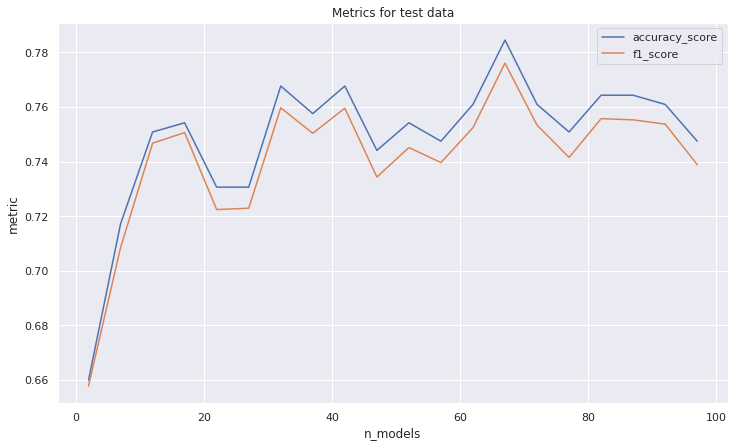

In [106]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42)
tree_accuracy_scores, tree_f1_scores = bagging(tree_model, std, pca, X_train, y_train, X_test, y_test, n_models)
draw_plot(tree_accuracy_scores, tree_f1_scores, n_models, 'Metrics for test data', 'n_models')

Ensembling trees gives an increase in the quality of the classification, and the optimal parameters of the trees may differ from those selected for one tree, because you need to get the most different algorithms - the trees must be retrained, and when choosing the optimal hyperparameters for a tree as an independent classifier, accuracy on the test is important. And so it happened: the ensemble of deeper trees learned better, in this case the optimal number of algorithms is about 75 (according to the graphic).

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
random_accuracy_scores = []
random_f1_scores = []
n_models = np.arange(2, 100, 5)
for k in n_models:
    rfc = RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=k, random_state=42, n_jobs=-1)
    rfc.fit(pca.transform(X_train_scaled), y_train)
    y_predict = rfc.predict(pca.transform(X_test_scaled))
    random_accuracy_scores.append(accuracy_score(y_test, y_predict))
    random_f1_scores.append(f1_score(y_test, y_predict, average='macro'))

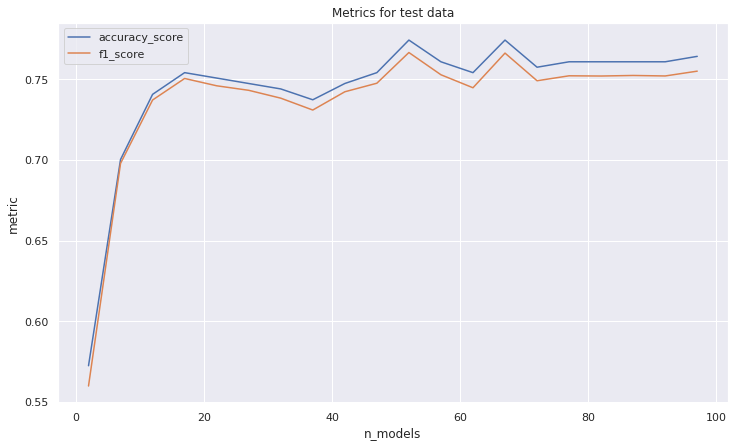

In [109]:
draw_plot(random_accuracy_scores, random_f1_scores, n_models, 'Metrics for test data', 'n_models')

The optimal value of the number of trees is about 54-55, which is less than in the previous paragraph - 75, although this value is also the peak of the metric. The random forest uses a selection of both objects and features, unlike bagging, so the optimal number of models in the approaches may differ - the algorithms themselves turn out to be even more different and they need less to get an answer when averaging + hyperparameters and the use of PCA not in the pipeline affect to the metric.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [135]:
size_of_first_part = 54
n_samples = [size_of_first_part * i for i in range(1, 11)]
def learning_curves(model, scaler, pca, X_train, y_train, X_test, y_test):
  accuracy_scores = []
  f1_scores = []
  indexes = np.random.permutation(len(X_train))
  pipeline = make_pipeline(scaler, pca, model)
  for i in range(0, 10):
    index_sample = indexes[:(i + 1) * size_of_first_part] if i < 9 else indexes
    pipeline.fit(X_train[index_sample], y_train[index_sample])
    y_predict = pipeline.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_predict))
    f1_scores.append(f1_score(y_test, y_predict, average='macro'))
  return accuracy_scores, f1_scores

In [153]:
linear_regression_model = LogisticRegression(C=50, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
linear_accuracy_scores, linear_f1_scores = learning_curves(linear_regression_model, std, pca, X_train, y_train, X_test, y_test)

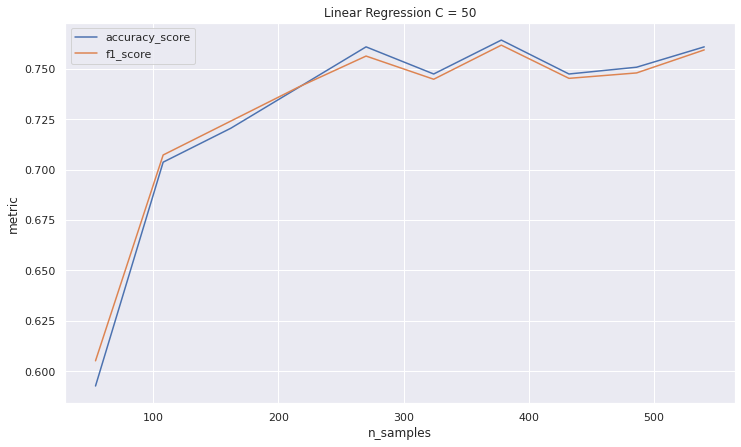

In [154]:
draw_plot(linear_accuracy_scores, linear_f1_scores, n_samples, 'Linear Regression C = 50', 'n_samples')

In [141]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42)
tree_accuracy_scores, tree_f1_scores = learning_curves(tree_model, std, pca, X_train, y_train, X_test, y_test)

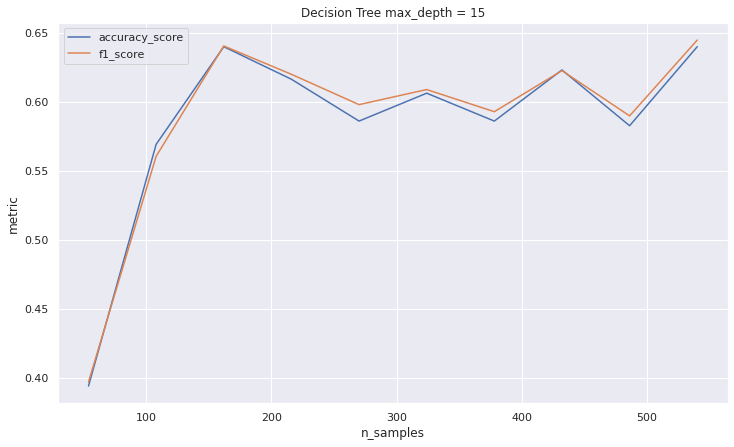

In [142]:
draw_plot(tree_accuracy_scores, tree_f1_scores, n_samples, 'Decision Tree max_depth = 15', 'n_samples')

In [161]:
rfc_model = RandomForestClassifier(n_estimators=60, random_state=42, n_jobs=-1, oob_score=True)
rfc_accuracy_scores, rfc_f1_scores = learning_curves(rfc_model, std, pca, X_train, y_train, X_test, y_test)

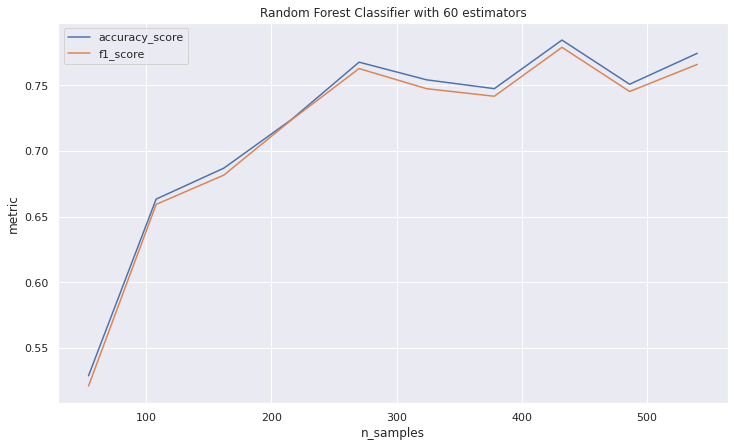

In [162]:
draw_plot(rfc_accuracy_scores, rfc_f1_scores, n_samples, 'Random Forest Classifier with 60 estimators', 'n_samples')

Conclusion: With an increase in the size of the training sample, the classification quality improves. There are non-monotonic sections of the graphs due to the possible imbalance of classes in parts of the dataset after mixing the indices, applying pca to small datasets (with a small number of parts) and the presence of randomness in the algorithms themselves.